## 这里我们学习如何读取数据文件

我们这里讲一下简单的数据文件的读取，我们这里仅仅只讲csv文件，其实很多别的文件都一样，都是用pandas读取进来变成一个data frame。
虽然data frame这个概念很重要，但是我们就不展开讲了，大家理解就是data frame就是一个类似于excel表格一样的东西。
通过pandas可以把csv，excel，mat等等都读取成为一个data frame

这次课中我们只需要使用pandas，读取数据，还有numpy简单操作一下数据，matplotlib画个图，所以不需要import太多东西。

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("------")


------


## 基本的读取

这里有个假的数据`data.csv`。你可以用excel打开它，如下图。csv就是逗号分隔符文件，就是一个文本的表格。实际上不一定是逗号分割，
你可以在padans读取的时候，指定分隔符。

![](2021-03-28-00-37-02.png)

大家亲参考下面的注释看看基本的操作。

In [2]:
#读取文件，默认都进来时一个data frame
df = pd.read_csv('data.csv')
# 这可以打印前5行出来，你可以看倒这个表格又是那么表头
print(df.head())
print(df.info())

   Duration  Pulse  Maxpulse  Calories    make
0        60    110       130     409.1   honda
1        60    117       145     479.0  nissan
2        60    103       135     340.0   mazda
3        45    109       175     282.4  toyota
4        45    117       148     406.0  subaru
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
 4   make      169 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB
None


In [3]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [4]:
dfarray = df.to_numpy()

In [5]:
df2 = df.T
df2.index

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories', 'make'], dtype='object')

In [6]:
# selecting data
df[1:2]

,Duration,Pulse,Maxpulse,Calories,make
1,60,117,145,479.0,nissan


In [7]:
df['Pulse']

0      110
1      117
2      103
3      109
4      117
      ... 
164    105
165    110
166    115
167    120
168    125
Name: Pulse, Length: 169, dtype: int64

In [8]:
df[df['Pulse'] == 110]



,Duration,Pulse,Maxpulse,Calories,make
0,60,110,130,409.1,honda
6,60,110,136,374.0,nissan
61,160,110,137,1034.4,nissan
64,20,110,130,131.4,subaru
77,45,110,141,300.0,mazda
149,60,110,150,409.4,subaru
165,60,110,145,300.0,honda


In [9]:
df[:4][['Pulse', 'Duration']]


,Pulse,Duration
0,110,60
1,117,60
2,103,60
3,109,45


In [10]:
df.value_counts("Pulse")


Pulse
100    19
90     12
103     9
109     9
107     8
108     7
110     7
97      7
111     6
106     6
105     6
102     6
98      6
104     4
114     4
115     3
95      3
118     3
93      3
92      3
136     3
117     3
150     2
123     2
151     2
80      2
112     2
101     2
99      2
152     1
129     1
149     1
141     1
137     1
153     1
130     1
113     1
125     1
124     1
122     1
121     1
120     1
119     1
116     1
83      1
85      1
159     1
dtype: int64

In [11]:
df.iloc[2:5, [0, 1, -1]]


,Duration,Pulse,make
2,60,103,mazda
3,45,109,toyota
4,45,117,subaru


In [12]:
# unique
df["Pulse"].unique()


array([110, 117, 103, 109, 102, 104,  98, 100, 106,  90,  97, 108, 130,
       105,  92, 101,  93, 107, 114, 111,  99, 123, 118, 136, 121, 115,
       153, 159, 149, 151, 129,  83,  80, 150,  95, 152, 137, 124, 116,
       112, 119, 113, 141, 122,  85, 120, 125], dtype=int64)

In [13]:
# append row
dfToAppend = pd.DataFrame([[111, 222]], columns=('Pulse', 'Duration'))
df.append(dfToAppend)

,Duration,Pulse,Maxpulse,Calories,make
0,60,110,130.0,409.1,honda
1,60,117,145.0,479.0,nissan
2,60,103,135.0,340.0,mazda
3,45,109,175.0,282.4,toyota
4,45,117,148.0,406.0,subaru
...,...,...,...,...,...
165,60,110,145.0,300.0,honda
166,60,115,145.0,310.2,nissan
167,75,120,150.0,320.4,mazda
168,75,125,150.0,330.4,toyota


In [14]:
# append colum
df.insert(4, "sum", np.zeros((df.shape[0])), True)
df["sum"] = np.sum(df[['Pulse', 'Duration']], 1) #axis = 1 压缩列


In [15]:
df

,Duration,Pulse,Maxpulse,Calories,sum,make
0,60,110,130,409.1,170,honda
1,60,117,145,479.0,177,nissan
2,60,103,135,340.0,163,mazda
3,45,109,175,282.4,154,toyota
4,45,117,148,406.0,162,subaru
...,...,...,...,...,...,...
164,60,105,140,290.8,165,subaru
165,60,110,145,300.0,170,honda
166,60,115,145,310.2,175,nissan
167,75,120,150,320.4,195,mazda


In [16]:
# 5%
# drop column
df.drop(columns=["sum"])

,Duration,Pulse,Maxpulse,Calories,make
0,60,110,130,409.1,honda
1,60,117,145,479.0,nissan
2,60,103,135,340.0,mazda
3,45,109,175,282.4,toyota
4,45,117,148,406.0,subaru
...,...,...,...,...,...
164,60,105,140,290.8,subaru
165,60,110,145,300.0,honda
166,60,115,145,310.2,nissan
167,75,120,150,320.4,mazda


In [17]:
# sort
df.sort_values('Pulse', inplace=True)
df[:3]

,Duration,Pulse,Maxpulse,Calories,sum,make
159,30,80,120,240.9,110,subaru
93,15,80,100,50.5,95,toyota
89,20,83,107,50.3,103,subaru


In [18]:
# clean data
# Empty cells
# Duplicates

df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 159 to 80
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
 4   sum       164 non-null    int64  
 5   make      164 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.0+ KB


In [19]:
df = pd.read_csv('data.csv')
df.fillna(130, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  169 non-null    float64
 4   make      169 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB


In [20]:
df = pd.read_csv('data.csv')
df['Calories'].fillna(df['Calories'].mean(), inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  169 non-null    float64
 4   make      169 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB


In [21]:
dup = df.duplicated().to_numpy()
dup.sum()
df.drop_duplicates(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  168 non-null    int64  
 1   Pulse     168 non-null    int64  
 2   Maxpulse  168 non-null    int64  
 3   Calories  168 non-null    float64
 4   make      168 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [22]:
# Quiz

# Which borough has the most noise complaints
complaints = pd.read_csv('./data/311-service-requests.csv')

complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

    

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

In [25]:
# Quiz
# Which borough has the most Noise - Street/Sidewalk complaints

complaints[complaints['Complaint Type'] =="Noise - Street/Sidewalk"]["Borough"].value_counts()


MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [31]:
# Quiz
# find all noise complain in brooklyn
is_noise = complaints['Complaint Type'].str.contains("Noise")
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225.0,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"
10,26595176,10/31/2013 01:25:12 AM,NaN,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218.0,3775 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634378,-73.969462,"(40.63437840816299, -73.96946177104543)"
20,26592932,10/31/2013 12:43:47 AM,10/31/2013 12:56:20 AM,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11216.0,778 PARK PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673505,-73.951844,"(40.67350473678714, -73.95184414979961)"
23,26592304,10/31/2013 12:38:00 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11216.0,371 TOMPKINS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.684944,-73.944221,"(40.6849442562592, -73.94422078036632)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236.0,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111049,26429663,10/04/2013 12:12:07 AM,10/04/2013 01:03:44 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11209.0,8915 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.619601,-74.027826,"(40.619601147364584, -74.02782628492785)"
111054,26426060,10/04/2013 12:06:39 AM,10/04/2013 12:31:16 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11224.0,4823 BEACH 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577515,-74.012207,"(40.57751513866536, -74.01220705163807)"
111055,26430628,10/04/2013 12:06:28 AM,10/04/2013 12:21:39 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11209.0,7915 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.628381,-74.029040,"(40.62838143294541, -74.02904041333245)"
111058,26426094,10/04/2013 12:05:12 AM,10/04/2013 01:08:29 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11237.0,211 KNICKERBOCKER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.703365,-73.926345,"(40.703365329011284, -73.92634531031759)"


In [34]:

# 练习，画出covid-19 confiremed case变化趋势和增长率曲线，知乎删除确诊累计人数最多的5个国家

cases = pd.read_csv("covid-19-cases.csv")


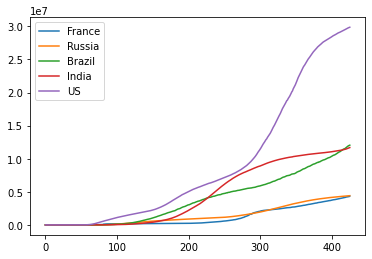

In [49]:
cases["sum"] = np.sum(cases.iloc[:, 5:-1], 1)
casesByCounty = cases.drop(columns=cases.columns[[0, 1, 3, 4]])
# countryRegions = casesByCounty["Country/Region"].unique()

casesByCounty = casesByCounty.groupby('Country/Region').sum()

topCases = casesByCounty.sort_values("sum")[-5:]

for i in range(topCases.index.shape[0]):
    plt.plot(topCases[i:i+1].to_numpy().T[:-1], label=topCases.index[i])

plt.legend()
